# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection,preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pickle
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential,model_from_json
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import optimizers
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Dense, LSTM, GRU, MaxPool1D, SimpleRNN, Flatten, Dropout, Conv1D
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Importing Dataset

In [3]:
df_users = pd.read_csv("dataset/users.csv")
df_fusers = pd.read_csv("dataset/fusers.csv")

# EDA

In [4]:
df_users.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,NaN,ja,...,NaN,15years ago X.Lines24,NaN,NaN,Tue Jun 11 11:20:35 +0000 2013,2013-06-11 13:20:35,2015-05-02 06:41:46,2016-03-15 15:53:47,0,0
1,2492782375,ro_or,1120Roll,2660,330,485,3972,5,NaN,ja,...,NaN,保守見習い地元大好き人間。 経済学、電工、仏教を勉強中、ちなDeではいかんのか？ (*^◯^*),NaN,NaN,Tue May 13 10:37:57 +0000 2014,2014-05-13 12:37:57,2015-05-01 17:20:27,2016-03-15 15:53:48,0,0
2,293212315,bearclaw,14KBBrown,1254,166,177,1185,0,NaN,en,...,NaN,Let me see what your best move is!,NaN,NaN,Wed May 04 23:30:37 +0000 2011,2011-05-05 01:30:37,2015-05-01 18:48:28,2016-03-15 15:53:48,0,0
3,191839658,pocahontas farida,wadespeters,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,...,NaN,20. menna: #farida #nyc and the 80s actually y...,NaN,NaN,Fri Sep 17 14:02:10 +0000 2010,2010-09-17 16:02:10,2015-05-01 13:55:16,2016-03-15 15:53:48,0,0
4,3020965143,Ms Kathy,191a5bd05da04dc,82,21,79,5,0,NaN,en,...,NaN,Cosmetologist,NaN,NaN,Fri Feb 06 04:10:49 +0000 2015,2015-02-06 05:10:49,2015-05-02 01:17:32,2016-03-15 15:53:48,0,0


In [5]:
df_fusers.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,description,contributors_enabled,following,updated
0,80479674,YI YUAN,yi_twitts,29,19,255,1,0,Wed Oct 07 03:19:21 +0000 2009,http://www.jycondo.com,...,-18000.0,NaN,NaN,NaN,NaN,NaN,real estate sales,NaN,NaN,2013-06-12 18:38:35
1,82487179,Marcos Perez C,marcos_peca,1408,208,866,138,0,Wed Oct 14 23:40:17 +0000 2009,NaN,...,-21600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-12 18:38:35
2,105830531,curti lorenzo,curtilorenzo,39,59,962,8,0,Sun Jan 17 16:46:52 +0000 2010,http://www.valcavargna.com/,...,0.0,NaN,NaN,NaN,NaN,NaN,le corna del capro scappato dal gregge s'infil...,NaN,NaN,2013-06-12 18:38:35
3,114488344,ruben dario toscano,gatito2710,59,7,49,4,0,Mon Feb 15 15:49:58 +0000 2010,NaN,...,-18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-12 18:38:35
4,123222267,Malek Khalaf,MalekKhalaf,987,60,521,61,1,Mon Mar 15 11:38:55 +0000 2010,http://www.facebook.com/Malek.AlBalawi,...,10800.0,NaN,NaN,NaN,NaN,NaN,"MA student at JU, Interested in Juventus,Italy...",NaN,NaN,2013-06-11 17:39:44


In [6]:
df_fusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  3351 non-null   int64  
 1   name                                3351 non-null   object 
 2   screen_name                         3351 non-null   object 
 3   statuses_count                      3351 non-null   int64  
 4   followers_count                     3351 non-null   int64  
 5   friends_count                       3351 non-null   int64  
 6   favourites_count                    3351 non-null   int64  
 7   listed_count                        3351 non-null   int64  
 8   created_at                          3351 non-null   object 
 9   url                                 101 non-null    object 
 10  lang                                3351 non-null   object 
 11  time_zone                           335 non

In [7]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3474 entries, 0 to 3473
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  3474 non-null   int64  
 1   name                                3473 non-null   object 
 2   screen_name                         3474 non-null   object 
 3   statuses_count                      3474 non-null   int64  
 4   followers_count                     3474 non-null   int64  
 5   friends_count                       3474 non-null   int64  
 6   favourites_count                    3474 non-null   int64  
 7   listed_count                        3474 non-null   int64  
 8   url                                 1266 non-null   object 
 9   lang                                3474 non-null   object 
 10  time_zone                           2475 non-null   object 
 11  location                            2365 no

In [8]:
isNotFake = np.zeros(3474)


isFake = np.ones(3351)

In [9]:
df_fusers["isFake"] = isFake
df_users["isFake"] = isNotFake

In [10]:
df_allUsers = pd.concat([df_fusers, df_users], ignore_index=True)
df_allUsers.columns = df_allUsers.columns.str.strip()

In [11]:
df_allUsers = df_allUsers.sample(frac=1).reset_index(drop=True)

In [12]:
Y = df_allUsers.isFake

In [13]:
df_allUsers.drop(["isFake"], axis=1, inplace=True)
X = df_allUsers

In [14]:
Y.reset_index(drop=True, inplace=True)

In [15]:
lang_list = list(enumerate(np.unique(X["lang"])))
lang_dict = {name : i for i, name in lang_list}
X.loc[:, "lang_num"] = X["lang"].map(lambda x: lang_dict[x]).astype(int)

X.drop(["name"], axis=1, inplace=True)

# Feature Selection

In [16]:
X = X[[
    "statuses_count",
    "followers_count",
    "friends_count",
    "favourites_count",
    "lang_num",
    "listed_count",
    "geo_enabled",
    "profile_use_background_image"
                        ]]

In [17]:
X = X.replace(np.nan, 0)

# Data visualization

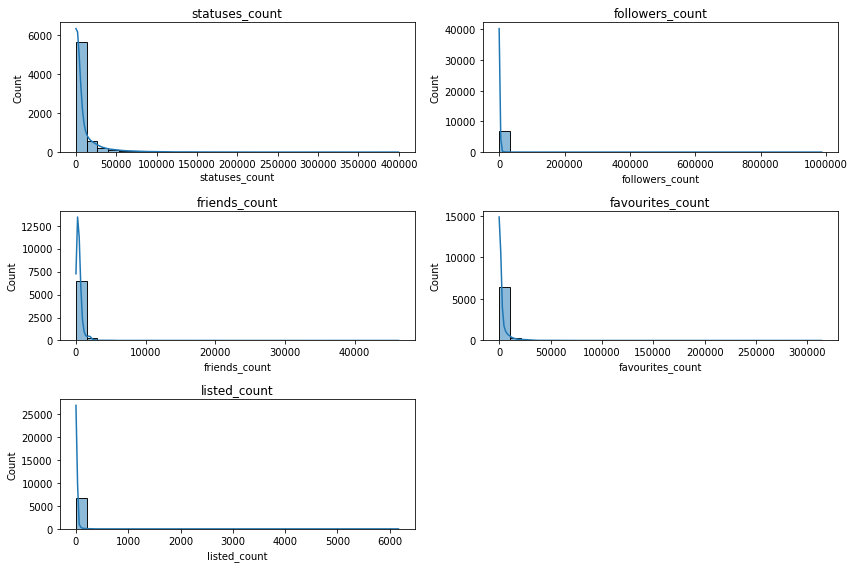

In [18]:
numerical_columns = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count']
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(X[column], bins=30, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

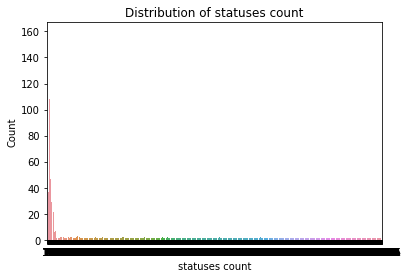

In [19]:
sns.countplot(x='statuses_count', data=X)
plt.title('Distribution of statuses count')
plt.xlabel('statuses count')
plt.ylabel('Count')
plt.show()

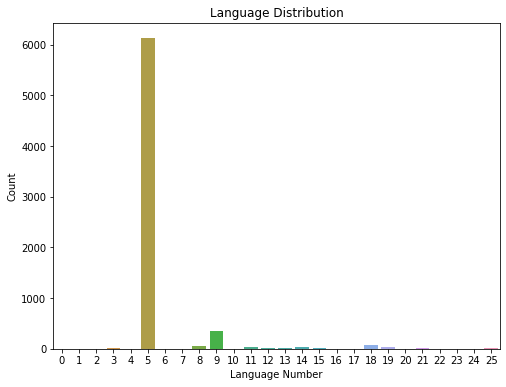

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='lang_num', data=X)
plt.title('Language Distribution')
plt.xlabel('Language Number')
plt.ylabel('Count')
plt.show()

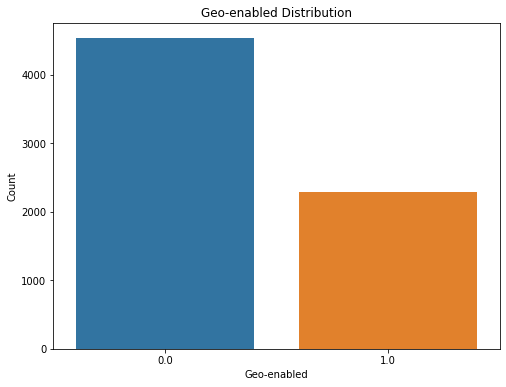

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x=X['geo_enabled'].value_counts().index, y=X['geo_enabled'].value_counts().values)
plt.title('Geo-enabled Distribution')
plt.xlabel('Geo-enabled')
plt.ylabel('Count')
plt.show()

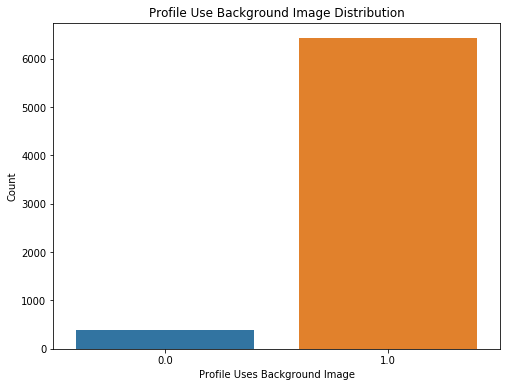

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x=X['profile_use_background_image'].value_counts().index, y=X['profile_use_background_image'].value_counts().values)
plt.title('Profile Use Background Image Distribution')
plt.xlabel('Profile Uses Background Image')
plt.ylabel('Count')
plt.show()

# Model Building

In [23]:
X_train, X_test , y_train , y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# ANN

In [24]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(64, input_dim=32, activation='relu'))
model.add(Dense(64, input_dim=64, activation='relu'))
model.add(Dense(32,input_dim=64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 8,673
Trainable params: 8,673
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=15,
                    verbose=1,
                    validation_data=(X_test,y_test))

Epoch 1/15
171/171 [==============================] - 1s 2ms/step - loss: 2.1110 - accuracy: 0.9440 - val_loss: 0.2490 - val_accuracy: 0.9751
Epoch 2/15
171/171 [==============================] - 0s 2ms/step - loss: 0.9928 - accuracy: 0.9560 - val_loss: 2.1129 - val_accuracy: 0.9744
Epoch 3/15
171/171 [==============================] - 0s 2ms/step - loss: 2.4963 - accuracy: 0.9780 - val_loss: 0.5244 - val_accuracy: 0.9736
Epoch 4/15
171/171 [==============================] - 0s 2ms/step - loss: 0.8403 - accuracy: 0.9758 - val_loss: 0.1165 - val_accuracy: 0.9846
Epoch 5/15
171/171 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.9663 - val_loss: 0.1405 - val_accuracy: 0.9795
Epoch 6/15
171/171 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.9775 - val_loss: 0.0697 - val_accuracy: 0.9890
Epoch 7/15
171/171 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.9667 - val_loss: 0.5689 - val_accuracy: 0.9656
Epoch 

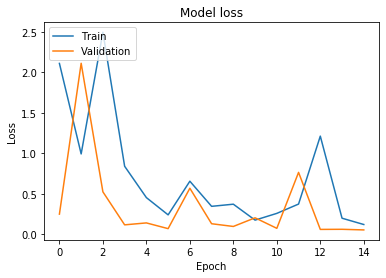

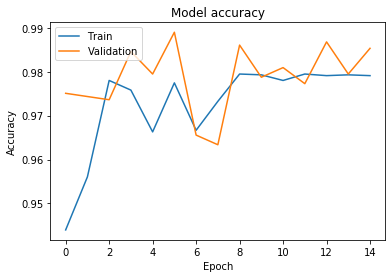

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [27]:
model.save('models/ann.h5')

In [28]:
y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

rnn_acc = accuracy_score(y_pred, y_test)
rnn_prec = precision_score(y_pred, y_test,average='weighted')
rnn_rec = recall_score(y_pred, y_test,average='weighted')
rnn_f1 = f1_score(y_pred, y_test,average='weighted')

43/43 [==============================] - 0s 474us/step


# Random Forest

In [29]:
X_train, X_test , y_train , y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [30]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

# Extreme Gradient Boost

In [31]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

gb_acc = accuracy_score(y_pred, y_test)
gb_prec = precision_score(y_pred, y_test,average='weighted')
gb_rec = recall_score(y_pred, y_test,average='weighted')
gb_f1 = f1_score(y_pred, y_test,average='weighted')

# LSTM

In [32]:
X_train_array = X_train.values
X_train_reshaped = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_array = X_test.values
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

In [33]:
model = Sequential()
model.add(LSTM(32, input_shape=(1, 8), activation='relu'))  
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))  
model.add(Dense(32, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5248      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 13,633
Trainable params: 13,633
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train_reshaped, y_train,
                    epochs=15,
                    verbose=1,
                    validation_data=(X_test_reshaped,y_test))

Epoch 1/15
171/171 [==============================] - 1s 4ms/step - loss: 0.7022 - accuracy: 0.9667 - val_loss: 0.1825 - val_accuracy: 0.9758
Epoch 2/15
171/171 [==============================] - 1s 3ms/step - loss: 0.2657 - accuracy: 0.9778 - val_loss: 0.1333 - val_accuracy: 0.9832
Epoch 3/15
171/171 [==============================] - 1s 3ms/step - loss: 0.2635 - accuracy: 0.9788 - val_loss: 0.0854 - val_accuracy: 0.9853
Epoch 4/15
171/171 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9795 - val_loss: 0.0635 - val_accuracy: 0.9773
Epoch 5/15
171/171 [==============================] - 0s 3ms/step - loss: 0.1851 - accuracy: 0.9793 - val_loss: 0.0848 - val_accuracy: 0.9824
Epoch 6/15
171/171 [==============================] - 0s 3ms/step - loss: 0.1591 - accuracy: 0.9804 - val_loss: 0.1144 - val_accuracy: 0.9846
Epoch 7/15
171/171 [==============================] - 0s 3ms/step - loss: 0.2643 - accuracy: 0.9844 - val_loss: 0.0720 - val_accuracy: 0.9824
Epoch 

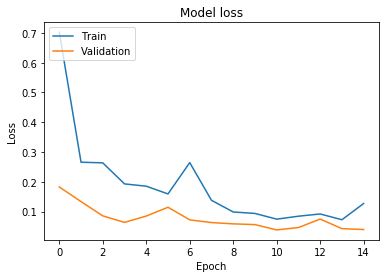

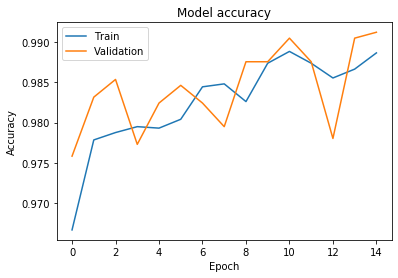

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [36]:
model.save('models/lstm.h5')

In [37]:
y_pred = model.predict(X_test_reshaped, verbose=1)
y_pred = np.argmax(y_pred, axis=1)

lstm_acc = accuracy_score(y_pred, y_test)
lstm_prec = precision_score(y_pred, y_test,average='weighted')
lstm_rec = recall_score(y_pred, y_test,average='weighted')
lstm_f1 = f1_score(y_pred, y_test,average='weighted')

43/43 [==============================] - 0s 746us/step


# CNN

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train = X_train.values
X_test = X_test.values

In [39]:
X_train_cnn = X_train.reshape(5460, 8, 1)  
X_test_cnn = X_test.reshape(1365,8,1)

model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(8, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train_cnn, y_train, epochs=15, batch_size=32, validation_split=0.1)


loss, accuracy = model.evaluate(X_test.reshape(len(X_test), 8, 1), y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/15
154/154 [==============================] - 2s 2ms/step - loss: 60.1646 - accuracy: 0.4727 - val_loss: 4.1601 - val_accuracy: 0.5092
Epoch 2/15
154/154 [==============================] - 0s 2ms/step - loss: 1.0150 - accuracy: 0.9158 - val_loss: 0.7457 - val_accuracy: 0.9835
Epoch 3/15
154/154 [==============================] - 0s 1ms/step - loss: 0.6230 - accuracy: 0.9841 - val_loss: 0.6445 - val_accuracy: 0.9835
Epoch 4/15
154/154 [==============================] - 0s 1ms/step - loss: 0.5589 - accuracy: 0.9831 - val_loss: 0.5546 - val_accuracy: 0.9817
Epoch 5/15
154/154 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.9839 - val_loss: 0.4581 - val_accuracy: 0.9799
Epoch 6/15
154/154 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.9825 - val_loss: 0.3681 - val_accuracy: 0.9799
Epoch 7/15
154/154 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.9819 - val_loss: 0.2851 - val_accuracy: 0.9835
Epoch

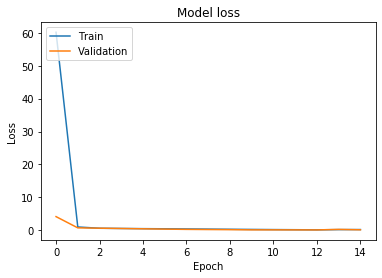

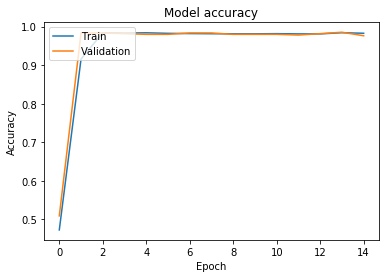

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [41]:
model.save('models/cnn.h5')

In [42]:
y_pred = model.predict(X_test_cnn, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

cnn_acc = accuracy_score(y_pred, y_test)
cnn_prec = precision_score(y_pred, y_test,average='weighted')
cnn_rec = recall_score(y_pred, y_test,average='weighted')
cnn_f1 = f1_score(y_pred, y_test,average='weighted')

43/43 [==============================] - 0s 524us/step


# Extension

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [44]:
clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()


eclf1 = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')


eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

# Comparison

In [45]:
results = {
    'accuracy': [rnn_acc, rf_acc, gb_acc, lstm_acc, cnn_acc,vot_acc],
    'precision': [rnn_prec, rf_prec, gb_prec, lstm_prec, cnn_prec,vot_prec],
    'f1': [rnn_f1, rf_f1, gb_f1, lstm_f1, cnn_f1,vot_f1],
    'recall': [rnn_rec, rf_rec, gb_rec, lstm_rec, cnn_rec, vot_rec]
}

index = ['RNN', 'Random Forest', 'Extreme Gradient Boost', 'LSTM', 'CNN','Voting Classifier']

In [46]:
results =pd.DataFrame(results,index=index)
print(results)

                        accuracy  precision        f1    recall
RNN                     0.508425   1.000000  0.674114  0.508425
Random Forest           0.979487   0.979600  0.979491  0.979487
Extreme Gradient Boost  0.995604   0.995609  0.995605  0.995604
LSTM                    0.508425   1.000000  0.674114  0.508425
CNN                     0.483516   1.000000  0.651852  0.483516
Voting Classifier       0.997776   0.997784  0.997776  0.997776


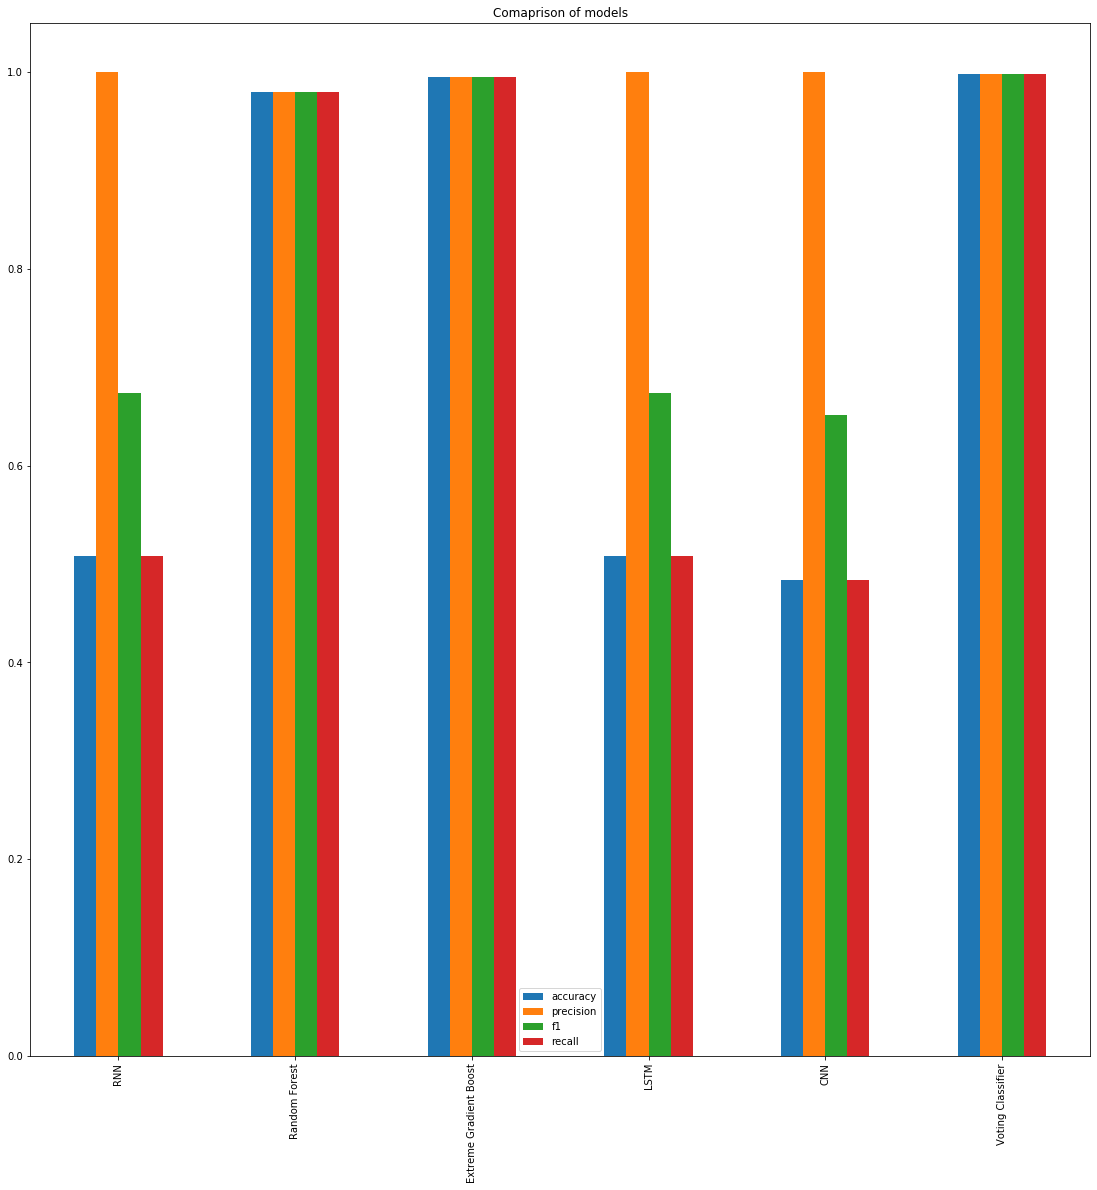

In [47]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

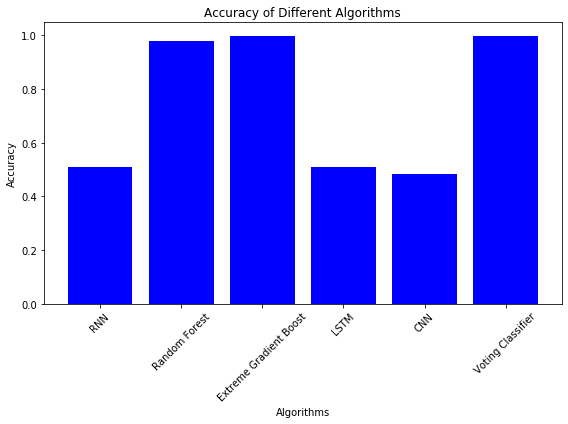

In [48]:
accuracy_values = results['accuracy']
accuracy_df = pd.DataFrame({'Algorithms': index, 'Accuracy': accuracy_values})

plt.figure(figsize=(8, 6))
plt.bar(accuracy_df['Algorithms'], accuracy_df['Accuracy'], color='blue')
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

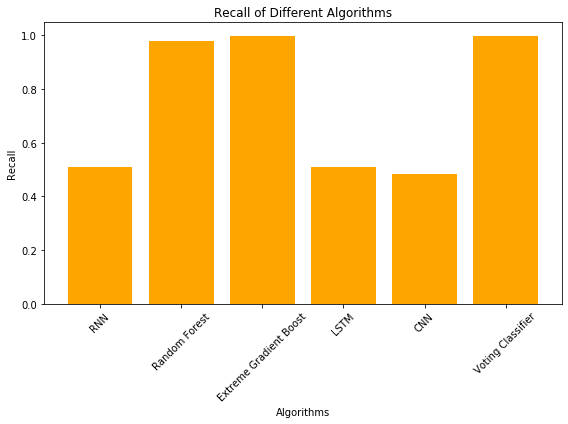

In [49]:
recall_values = results['recall']
recall_df = pd.DataFrame({'Algorithms': index, 'Recall': recall_values})

plt.figure(figsize=(8, 6))
plt.bar(recall_df['Algorithms'], recall_df['Recall'], color='orange')
plt.title('Recall of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

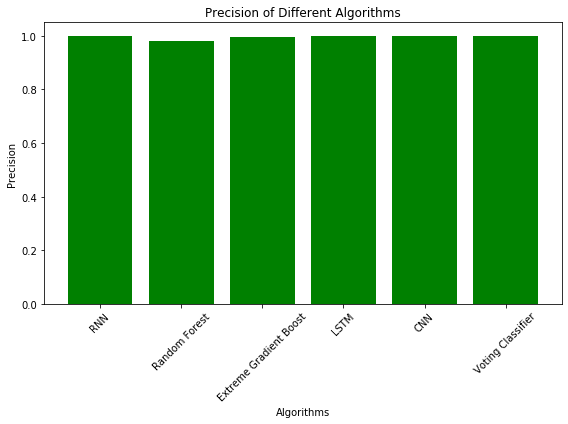

In [50]:
precision_values = results['precision']
precision_df = pd.DataFrame({'Algorithms': index, 'Precision': precision_values})

plt.figure(figsize=(8, 6))
plt.bar(precision_df['Algorithms'], precision_df['Precision'], color='green')
plt.title('Precision of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

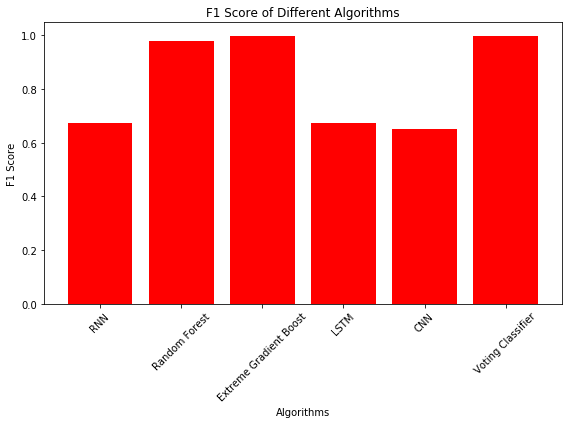

In [51]:
f1_values = results['f1']
f1_df = pd.DataFrame({'Algorithms': index, 'F1 Score': f1_values})

plt.figure(figsize=(8, 6))
plt.bar(f1_df['Algorithms'], f1_df['F1 Score'], color='red')
plt.title('F1 Score of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Saving Model

In [52]:
pickle.dump(eclf1,open('models/model.sav','wb'))